In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
rs=42

## Regresion lineal simple

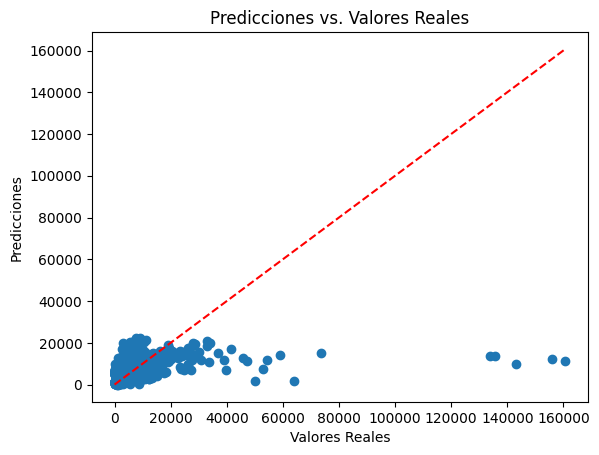

Intercept: -5846300.832502183
Coefficients: [ 2.89521702e+03 -3.57343394e+02 -1.51334999e+01  2.25204025e+01
  9.08263838e-03]
R^2: 0.11939162977792339
MAE: 6407.793541335677
MSE: 224515725.07893592
RMSE: 14983.848807263637


In [4]:
# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

df['date'] = pd.to_datetime(df['date'])

# Crear nuevas columnas 'year', 'month' y 'day'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Selección de características y variable objetivo
X = df[['year', 'month', 'day', 'new_deceased', 'vaccine_doses_administered_for_day']]
y = df['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

## Regresion lineal simple (observando el dia anterior)

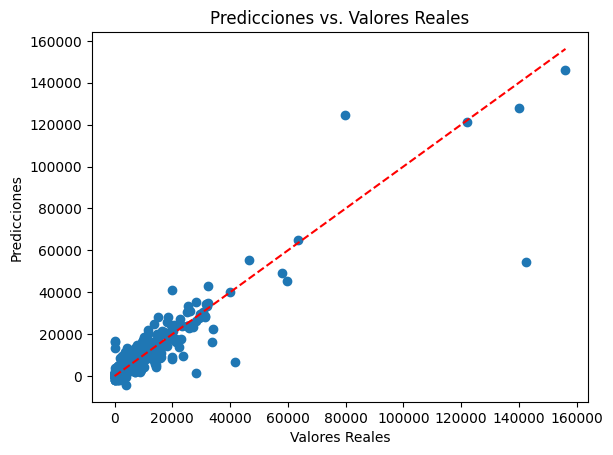

Intercept: 744.53027040907
Coefficients: [ 7.64524370e+01  1.24519069e-02  8.80579418e-01 -7.36554472e+01
 -8.79743393e-03 -6.33757547e+02 -1.15184916e+03]
                                    Feature  Coefficient
0                              new_deceased    76.452437
1        vaccine_doses_administered_for_day     0.012452
2                       new_confirmed_lag_1     0.880579
3                        new_deceased_lag_1   -73.655447
4  vaccine_doses_administered_for_day_lag_1    -0.008797
5                           country_code_CO  -633.757547
6                           country_code_PE -1151.849157
R^2: 0.8429275133611109
MAE: 2456.151398281669
MSE: 31854704.62794462
RMSE: 5643.997220759824


In [5]:
# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 1  # Número de días para mirar hacia atrás
for i in range(1, X_days + 1):
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)
    df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)
    df[f'vaccine_doses_administered_for_day_lag_{i}'] = df.groupby('country_code')['vaccine_doses_administered_for_day'].shift(i)

# Eliminar filas con valores NaN (debido al desplazamiento)
df = df.dropna()

# Codificar la columna 'country_code'
df = pd.get_dummies(df, columns=['country_code'], drop_first=True)

# Selección de características y variable objetivo
feature_cols = [col for col in df.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
X = df[feature_cols]
y = df['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

## Regresion lineal simple (observando los 3 dias anteriores)

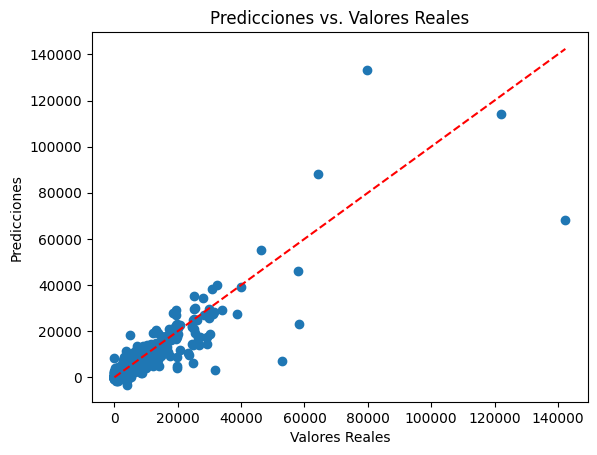

Intercept: 332.3999693157448
Coefficients: [ 7.18633685e+01  1.26204061e-02  7.51891396e-01 -5.79976275e+01
 -3.90666491e-03  1.75033228e-02 -4.56008302e+00 -2.39637702e-03
  1.52528740e-01 -8.04014117e+00 -3.68070862e-03 -2.08055445e+02
 -5.20021350e+02]
                                     Feature  Coefficient
0                               new_deceased    71.863368
1         vaccine_doses_administered_for_day     0.012620
2                        new_confirmed_lag_1     0.751891
3                         new_deceased_lag_1   -57.997628
4   vaccine_doses_administered_for_day_lag_1    -0.003907
5                        new_confirmed_lag_2     0.017503
6                         new_deceased_lag_2    -4.560083
7   vaccine_doses_administered_for_day_lag_2    -0.002396
8                        new_confirmed_lag_3     0.152529
9                         new_deceased_lag_3    -8.040141
10  vaccine_doses_administered_for_day_lag_3    -0.003681
11                           country_code_CO  -2

In [6]:
# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 3  # Número de días para mirar hacia atrás
for i in range(1, X_days + 1):
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)
    df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)
    df[f'vaccine_doses_administered_for_day_lag_{i}'] = df.groupby('country_code')['vaccine_doses_administered_for_day'].shift(i)

# Eliminar filas con valores NaN (debido al desplazamiento)
df = df.dropna()

# Codificar la columna 'country_code'
df = pd.get_dummies(df, columns=['country_code'], drop_first=True)

# Selección de características y variable objetivo
feature_cols = [col for col in df.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
X = df[feature_cols]
y = df['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


## valor óptimo de X_days que minimiza el error del modelo

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)
        df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)
        df[f'vaccine_doses_administered_for_day_lag_{i}'] = df.groupby('country_code')['vaccine_doses_administered_for_day'].shift(i)
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    # Codificar la columna 'country_code'
    df_temp = pd.get_dummies(df_temp, columns=['country_code'], drop_first=True)
    
    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
    X = df_temp[feature_cols]
    y = df_temp['new_confirmed']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2          MAE           MSE         RMSE
0        1  0.842928  2456.151398  3.185470e+07  5643.997221
1        2  0.819672  2303.294338  2.153740e+07  4640.840067
2        3  0.761126  2395.282258  3.311482e+07  5754.547491
3        4  0.765460  2363.449030  4.450459e+07  6671.175963
4        5  0.802754  2155.303389  2.474051e+07  4973.983452
5        6  0.855908  2319.192007  3.622898e+07  6019.051667
6        7  0.901382  2087.133343  2.366568e+07  4864.738938
7        8  0.961417  1216.345953  6.364476e+06  2522.791378
8        9  0.957011  1260.311941  5.888892e+06  2426.703842
9       10  0.912059  1300.277621  8.774839e+06  2962.235449
10      11  0.927107  1348.684219  1.185837e+07  3443.598000
11      12  0.916095  1401.109245  1.291391e+07  3593.593154
12      13  0.926671  1460.380965  1.417619e+07  3765.128799
13      14  0.958068  1281.069026  7.088544e+06  2662.431910
14      15  0.959389  1194.423707  5.773969e+06  2402.908424
15      16  0.926531  12

## valor óptimo de X_days que minimiza el error del modelo (solo con nuevos confirmados)

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)

    
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    # Codificar la columna 'country_code'
    df_temp = pd.get_dummies(df_temp, columns=['country_code'], drop_first=True)
    
    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
    X = df_temp[feature_cols]
    y = df_temp['new_confirmed']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2          MAE           MSE         RMSE
0        1  0.839895  2170.920464  3.246978e+07  5698.225633
1        2  0.810794  2126.711334  2.259776e+07  4753.709902
2        3  0.746850  2217.754303  3.509400e+07  5924.018822
3        4  0.744823  2311.418281  4.842036e+07  6958.474204
4        5  0.778279  1998.791308  2.781039e+07  5273.555617
5        6  0.842560  2200.301160  3.958505e+07  6291.664798
6        7  0.893704  1997.397316  2.550808e+07  5050.552057
7        8  0.960255  1164.870108  6.556222e+06  2560.512078
8        9  0.958982  1188.138683  5.618914e+06  2370.424752
9       10  0.914013  1233.927848  8.579852e+06  2929.138474
10      11  0.929166  1257.937644  1.152345e+07  3394.621265
11      12  0.915764  1342.868811  1.296483e+07  3600.671354
12      13  0.929038  1353.231052  1.371862e+07  3703.865748
13      14  0.960312  1178.099292  6.709310e+06  2590.233495
14      15  0.961078  1109.779473  5.533941e+06  2352.433095
15      16  0.925138  11

## valor óptimo de X_days que minimiza el error del modelo (solo con nuevos confirmados) + dia de la semana

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)

    
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    
    # Codificar la columna 'country_code' y 'day_of_week'
    df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)
    


    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
    X = df_temp[feature_cols]
    y = df_temp['new_confirmed']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2          MAE           MSE         RMSE
0        1  0.854385  2240.135735  2.953118e+07  5434.259830
1        2  0.833179  2147.371456  1.992417e+07  4463.650046
2        3  0.768357  2324.671079  3.211237e+07  5666.778124
3        4  0.765373  2376.663664  4.452100e+07  6672.405662
4        5  0.793285  2223.542329  2.592823e+07  5091.976572
5        6  0.849485  2362.524642  3.784377e+07  6151.728954
6        7  0.900514  2096.633297  2.387393e+07  4886.095592
7        8  0.961393  1179.320267  6.368444e+06  2523.577580
8        9  0.959509  1189.152190  5.546770e+06  2355.158162
9       10  0.914309  1235.642590  8.550362e+06  2924.100201
10      11  0.928558  1274.557328  1.162236e+07  3409.158744
11      12  0.916971  1338.684181  1.277909e+07  3574.785514
12      13  0.928873  1370.031209  1.375035e+07  3708.146393
13      14  0.960486  1192.516500  6.679830e+06  2584.536721
14      15  0.961255  1128.781519  5.508757e+06  2347.074115
15      16  0.925048  11

## 8 dias anteriores + dia de la semana

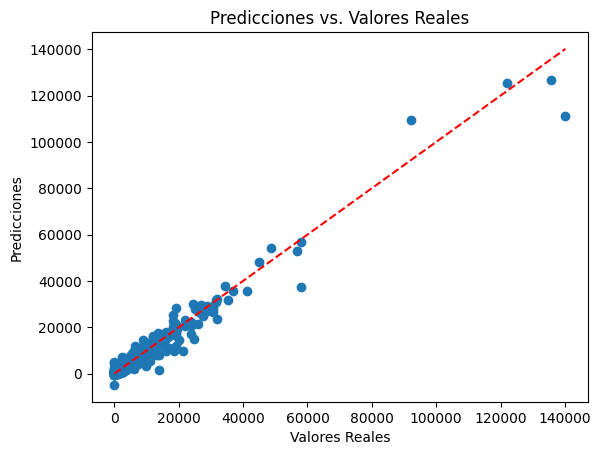

Intercept: 457.05373126871746
Coefficients: [ 7.94650355e-01  2.03326450e-03  8.34508571e-01 -9.66795102e-03
  2.35091735e-02 -2.18415986e-02  3.60321625e-02  1.05407914e-03
  8.44666593e-01 -7.60259511e-01 -2.78839311e+02 -4.51390727e+02
  1.81241975e+02 -5.06558377e+02 -5.16192479e+02 -6.24757059e+00
 -3.61926110e+01 -8.38234257e+01]
                               Feature  Coefficient
0                         new_deceased     0.794650
1   vaccine_doses_administered_for_day     0.002033
2                  new_confirmed_lag_1     0.834509
3                  new_confirmed_lag_2    -0.009668
4                  new_confirmed_lag_3     0.023509
5                  new_confirmed_lag_4    -0.021842
6                  new_confirmed_lag_5     0.036032
7                  new_confirmed_lag_6     0.001054
8                  new_confirmed_lag_7     0.844667
9                  new_confirmed_lag_8    -0.760260
10                     country_code_CO  -278.839311
11                     country_code_PE

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 8  # Número de días para mirar hacia atrás
# Crear características basadas en los últimos X días
for i in range(1, X_days + 1):
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)



# Eliminar filas con valores NaN (debido al desplazamiento)
df_temp = df.dropna()


# Codificar la columna 'country_code' y 'day_of_week'
df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)



# Selección de características y variable objetivo
feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed']]
X = df_temp[feature_cols]
y = df_temp['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
    
# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

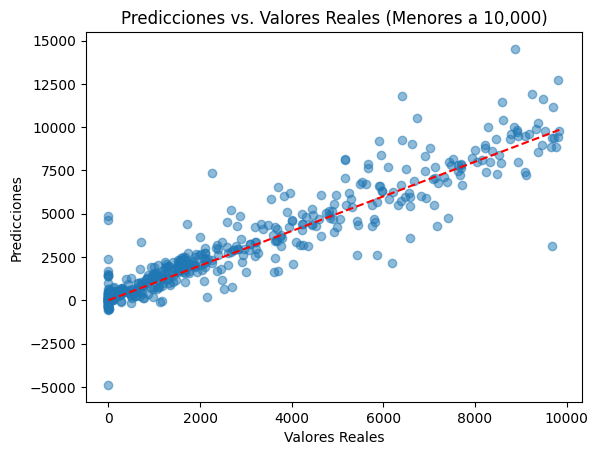

In [11]:
# Filtrar los datos para valores reales menores a 10,000
filter_condition = y_test < 10000
y_test_filtered = y_test[filter_condition]
y_pred_filtered = y_pred[filter_condition]

# Visualizar predicciones vs. valores reales
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Menores a 10,000)')
plt.plot([y_test_filtered.min(), y_test_filtered.max()], [y_test_filtered.min(), y_test_filtered.max()], color='red', linestyle='--')
plt.show()


## modelo solo con los X dias anteriores (no incluye el dia actual)

In [12]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)

    
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    
    # Codificar la columna 'country_code' y 'day_of_week'
    df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)
    


    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed', 'new_deceased', 'vaccine_doses_administered_for_day']]
    X = df_temp[feature_cols]
    y = df_temp['new_confirmed']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2          MAE           MSE         RMSE
0        1  0.854527  2212.978443  2.950238e+07  5431.609510
1        2  0.828079  2147.468369  2.053327e+07  4531.364963
2        3  0.766846  2340.805656  3.232192e+07  5685.236806
3        4  0.765975  2402.169082  4.440678e+07  6663.841187
4        5  0.792803  2251.167845  2.598871e+07  5097.912618
5        6  0.855637  2373.667206  3.629689e+07  6024.690242
6        7  0.900563  2081.776212  2.386226e+07  4884.900789
7        8  0.961073  1198.097662  6.421324e+06  2534.033064
8        9  0.958711  1197.356795  5.656122e+06  2378.260316
9       10  0.912790  1237.278052  8.701935e+06  2949.904204
10      11  0.929304  1258.517823  1.150102e+07  3391.315517
11      12  0.915461  1348.384940  1.301159e+07  3607.157932
12      13  0.927813  1368.318276  1.395541e+07  3735.694341
13      14  0.959210  1197.416641  6.895582e+06  2625.944115
14      15  0.960348  1134.939984  5.637659e+06  2374.375440
15      16  0.925378  11

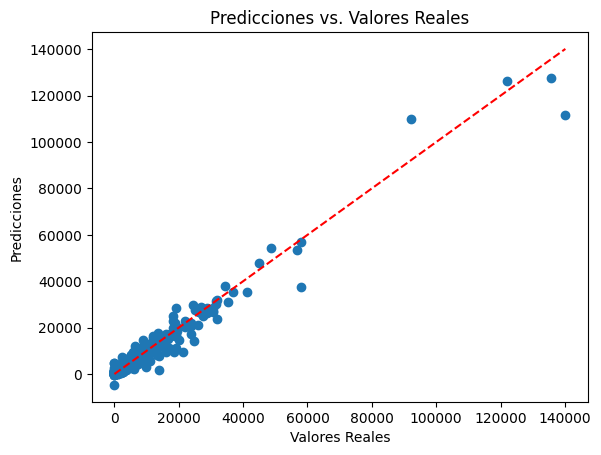

Intercept: 588.3765749494705
Coefficients: [ 8.34062853e-01 -8.89134926e-03  2.33316233e-02 -2.00695983e-02
  3.63219282e-02  6.22331488e-04  8.48063604e-01 -7.58157435e-01
 -1.74488072e+02 -2.49826838e+02  1.66949323e+02 -5.26427189e+02
 -5.64002082e+02 -2.35836412e+01 -5.63166043e+01 -8.42412450e+01]
                  Feature  Coefficient
0     new_confirmed_lag_1     0.834063
1     new_confirmed_lag_2    -0.008891
2     new_confirmed_lag_3     0.023332
3     new_confirmed_lag_4    -0.020070
4     new_confirmed_lag_5     0.036322
5     new_confirmed_lag_6     0.000622
6     new_confirmed_lag_7     0.848064
7     new_confirmed_lag_8    -0.758157
8         country_code_CO  -174.488072
9         country_code_PE  -249.826838
10     day_of_week_Monday   166.949323
11   day_of_week_Saturday  -526.427189
12     day_of_week_Sunday  -564.002082
13   day_of_week_Thursday   -23.583641
14    day_of_week_Tuesday   -56.316604
15  day_of_week_Wednesday   -84.241245
R^2: 0.9610725348484368
MAE: 1198

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 8  # Número de días para mirar hacia atrás
# Crear características basadas en los últimos X días
for i in range(1, X_days + 1):
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)



# Eliminar filas con valores NaN (debido al desplazamiento)
df_temp = df.dropna()


# Codificar la columna 'country_code' y 'day_of_week'
df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)



# Selección de características y variable objetivo
feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_confirmed', 'new_deceased', 'vaccine_doses_administered_for_day']]
X = df_temp[feature_cols]
y = df_temp['new_confirmed']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
    
# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')